# Initialization

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Xavier and He Initialization

In [3]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [4]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [5]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

# Nonsaturating Activation Functions

In [6]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 100us/sample - loss: 1.2810 - accuracy: 0.6205 - val_loss: 0.8869 - val_accuracy: 0.7160
Epoch 2/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.7952 - accuracy: 0.7369 - val_loss: 0.7132 - val_accuracy: 0.7626
Epoch 3/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.6817 - accuracy: 0.7726 - val_loss: 0.6385 - val_accuracy: 0.7896
Epoch 4/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.6219 - accuracy: 0.7941 - val_loss: 0.5931 - val_accuracy: 0.8016
Epoch 5/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5829 - accuracy: 0.8074 - val_loss: 0.5607 - val_accuracy: 0.8164
Epoch 6/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5552 - accuracy: 0.8173 - val_loss: 0.5354 - val_accuracy: 0.8242
Epoch 7/10
55000/55000 [==============================] 

In [11]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 65us/sample - loss: 1.3452 - accuracy: 0.6203 - val_loss: 0.9241 - val_accuracy: 0.7170
Epoch 2/10
55000/55000 [==============================] - 3s 59us/sample - loss: 0.8196 - accuracy: 0.7364 - val_loss: 0.7314 - val_accuracy: 0.7602
Epoch 3/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.6970 - accuracy: 0.7702 - val_loss: 0.6517 - val_accuracy: 0.7876
Epoch 4/10
55000/55000 [==============================] - 3s 58us/sample - loss: 0.6333 - accuracy: 0.7914 - val_loss: 0.6033 - val_accuracy: 0.8058
Epoch 5/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.5917 - accuracy: 0.8049 - val_loss: 0.5689 - val_accuracy: 0.8164
Epoch 6/10
55000/55000 [==============================] - 3s 58us/sample - loss: 0.5619 - accuracy: 0.8144 - val_loss: 0.5417 - val_accuracy: 0.8222
Epoch 7/10
55000/55000 [==============================] -

In [14]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


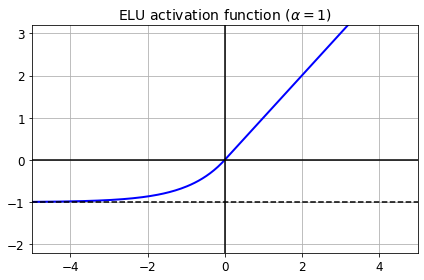

In [16]:
z = np.linspace(-5, 5, 200)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [17]:
keras.layers.Dense(10, activation="elu")

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [21]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 20s 360us/sample - loss: 1.1558 - accuracy: 0.5592 - val_loss: 0.8964 - val_accuracy: 0.6488
Epoch 2/5
55000/55000 [==============================] - 17s 317us/sample - loss: 0.8153 - accuracy: 0.6876 - val_loss: 0.7265 - val_accuracy: 0.7274
Epoch 3/5
55000/55000 [==============================] - 17s 316us/sample - loss: 0.7815 - accuracy: 0.7148 - val_loss: 0.7316 - val_accuracy: 0.7278
Epoch 4/5
55000/55000 [==============================] - 17s 316us/sample - loss: 0.7364 - accuracy: 0.7339 - val_loss: 0.6408 - val_accuracy: 0.7650
Epoch 5/5
55000/55000 [==============================] - 17s 317us/sample - loss: 0.6470 - accuracy: 0.7632 - val_loss: 0.5619 - val_accuracy: 0.7880


# Batch Normalization

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_110 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_111 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_112 (Dense)            (None, 10)               

In [24]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [25]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.8761 - accuracy: 0.7122 - val_loss: 0.5509 - val_accuracy: 0.8230
Epoch 2/10
55000/55000 [==============================] - 5s 92us/sample - loss: 0.5737 - accuracy: 0.8037 - val_loss: 0.4722 - val_accuracy: 0.8456
Epoch 3/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5142 - accuracy: 0.8229 - val_loss: 0.4376 - val_accuracy: 0.8576
Epoch 4/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4826 - accuracy: 0.8327 - val_loss: 0.4134 - val_accuracy: 0.8644
Epoch 5/10
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4570 - accuracy: 0.8413 - val_loss: 0.3989 - val_accuracy: 0.8650
Epoch 6/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4432 - accuracy: 0.8454 - val_loss: 0.3870 - val_accuracy: 0.8696
Epoch 7/10
55000/55000 [==============================] -

In [28]:
# Alternatively, add BN before activation function

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 93us/sample - loss: 1.0334 - accuracy: 0.6755 - val_loss: 0.6738 - val_accuracy: 0.7832
Epoch 2/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.6761 - accuracy: 0.7821 - val_loss: 0.5562 - val_accuracy: 0.8194
Epoch 3/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.5929 - accuracy: 0.8057 - val_loss: 0.5006 - val_accuracy: 0.8370
Epoch 4/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.5467 - accuracy: 0.8160 - val_loss: 0.4652 - val_accuracy: 0.8454
Epoch 5/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.5114 - accuracy: 0.8270 - val_loss: 0.4427 - val_accuracy: 0.8518
Epoch 6/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4903 - accuracy: 0.8333 - val_loss: 0.4264 - val_accuracy: 0.8544
Epoch 7/10
55000/55000 [==============================] -

# Gradient Clipping

In [30]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [31]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Supervised pretraining

First we split the fashion MNIST training set:

1) X_train_A: all items except for sandals and shirts (classes 5 and 6).

2) X_train_B: a smaller set of 200 images of sandals or shirts.

In [32]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [33]:
X_train_A.shape

(43986, 28, 28)

In [34]:
X_train_B.shape

(200, 28, 28)

In [35]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [36]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [37]:
tf.random.set_seed(42)
np.random.seed(42)

In [38]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [39]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])


history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 3s 66us/sample - loss: 0.5902 - accuracy: 0.8130 - val_loss: 0.3782 - val_accuracy: 0.8690
Epoch 2/20
43986/43986 [==============================] - 3s 60us/sample - loss: 0.3517 - accuracy: 0.8784 - val_loss: 0.3374 - val_accuracy: 0.8837
Epoch 3/20
43986/43986 [==============================] - 3s 60us/sample - loss: 0.3162 - accuracy: 0.8897 - val_loss: 0.3017 - val_accuracy: 0.8959
Epoch 4/20
43986/43986 [==============================] - 3s 60us/sample - loss: 0.2969 - accuracy: 0.8975 - val_loss: 0.2912 - val_accuracy: 0.9021
Epoch 5/20
43986/43986 [==============================] - 3s 60us/sample - loss: 0.2831 - accuracy: 0.9026 - val_loss: 0.2820 - val_accuracy: 0.9018
Epoch 6/20
43986/43986 [==============================] - 3s 60us/sample - loss: 0.2726 - accuracy: 0.9067 - val_loss: 0.2738 - val_accuracy: 0.9068
Epoch 7/20
43986/43986 [==============================] -

In [40]:
model_A.save("my_model_A.h5")

In [41]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [42]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.9509 - accuracy: 0.4800 - val_loss: 0.6533 - val_accuracy: 0.5568
Epoch 2/20
200/200 [==============================] - 0s 328us/sample - loss: 0.5837 - accuracy: 0.7100 - val_loss: 0.4825 - val_accuracy: 0.8479
Epoch 3/20
200/200 [==============================] - 0s 326us/sample - loss: 0.4527 - accuracy: 0.8750 - val_loss: 0.4097 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 310us/sample - loss: 0.3869 - accuracy: 0.9050 - val_loss: 0.3630 - val_accuracy: 0.9209
Epoch 5/20
200/200 [==============================] - 0s 288us/sample - loss: 0.3404 - accuracy: 0.9300 - val_loss: 0.3302 - val_accuracy: 0.9280
Epoch 6/20
200/200 [==============================] - 0s 327us/sample - loss: 0.3073 - accuracy: 0.9350 - val_loss: 0.3026 - val_accuracy: 0.9381
Epoch 7/20
200/200 [==============================] - 0s 305us/sample - loss: 0.

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_113 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [44]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [45]:
# To have an unchanged version of model_A during supervised learning, clone it and its weights:

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [46]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 1s 4ms/sample - loss: 0.5619 - accuracy: 0.6700 - val_loss: 0.5676 - val_accuracy: 0.6521
Epoch 2/4
200/200 [==============================] - 0s 322us/sample - loss: 0.5249 - accuracy: 0.7200 - val_loss: 0.5343 - val_accuracy: 0.6937
Epoch 3/4
200/200 [==============================] - 0s 267us/sample - loss: 0.4922 - accuracy: 0.7400 - val_loss: 0.5044 - val_accuracy: 0.7181
Epoch 4/4
200/200 [==============================] - 0s 273us/sample - loss: 0.4628 - accuracy: 0.7600 - val_loss: 0.4778 - val_accuracy: 0.7394


In [47]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 0s 2ms/sample - loss: 0.3865 - accuracy: 0.8250 - val_loss: 0.3362 - val_accuracy: 0.8682
Epoch 2/16
200/200 [==============================] - 0s 321us/sample - loss: 0.2701 - accuracy: 0.9300 - val_loss: 0.2611 - val_accuracy: 0.9280
Epoch 3/16
200/200 [==============================] - 0s 305us/sample - loss: 0.2081 - accuracy: 0.9650 - val_loss: 0.2151 - val_accuracy: 0.9513
Epoch 4/16
200/200 [==============================] - 0s 300us/sample - loss: 0.1694 - accuracy: 0.9800 - val_loss: 0.1841 - val_accuracy: 0.9635
Epoch 5/16
200/200 [==============================] - 0s 312us/sample - loss: 0.1427 - accuracy: 0.9800 - val_loss: 0.1602 - val_accuracy: 0.9716
Epoch 6/16
200/200 [==============================] - 0s 299us/sample - loss: 0.1219 - accuracy: 0.9850 - val_loss: 0.1424 - val_accuracy: 0.9797
Epoch 7/16
200/200 [==============================] - 0s 299us/sample - loss: 0.

In [51]:
_ , B_accuracy = model_B.evaluate(X_test_B, y_test_B);
_ , B_on_A_accuracy = model_B_on_A.evaluate(X_test_B, y_test_B);

(1 - B_accuracy) / (1 - B_on_A_accuracy)

2000/2000 [==============================] - 0s 39us/sample - loss: 0.0697 - accuracy: 0.9925


4.066669845584086

So, the error rate dropped by a factor of 4.

# Faster Optimizers

In [52]:
# Momentum optimization
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

# Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

# AdaGrad
optimizer = keras.optimizers.Adagrad(lr=0.001)

# RMSProp
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

# Adam Optimization
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Adamax Optimization
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

# Nadam Optimization
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Learning Rate Scheduling

### Power Scheduling

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [53]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [54]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4723 - accuracy: 0.8361 - val_loss: 0.3830 - val_accuracy: 0.8642
Epoch 2/25
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3454 - accuracy: 0.8729 - val_loss: 0.3383 - val_accuracy: 0.8780
Epoch 3/25
55000/55000 [==============================] - 4s 72us/sample - loss: 0.3056 - accuracy: 0.8876 - val_loss: 0.3485 - val_accuracy: 0.8742
Epoch 4/25
55000/55000 [==============================] - 4s 72us/sample - loss: 0.2796 - accuracy: 0.8957 - val_loss: 0.3492 - val_accuracy: 0.8782
Epoch 5/25
55000/55000 [==============================] - 5s 82us/sample - loss: 0.2598 - accuracy: 0.9027 - val_loss: 0.3384 - val_accuracy: 0.8862
Epoch 6/25
55000/55000 [==============================] - 4s 79us/sample - loss: 0.2404 - accuracy: 0.9099 - val_loss: 0.3805 - val_accuracy: 0.8752
Epoch 7/25
55000/55000 [==============================] -

## Exponential Scheduling

In [55]:
# The schedule function can take epoch and lr as arguments:

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [57]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 5s 92us/sample - loss: 0.8582 - accuracy: 0.7551 - val_loss: 0.6840 - val_accuracy: 0.7208
Epoch 2/25
55000/55000 [==============================] - 4s 79us/sample - loss: 0.6948 - accuracy: 0.7927 - val_loss: 0.5689 - val_accuracy: 0.8076
Epoch 3/25
55000/55000 [==============================] - 4s 77us/sample - loss: 0.6328 - accuracy: 0.8084 - val_loss: 0.6285 - val_accuracy: 0.8274
Epoch 4/25
55000/55000 [==============================] - 4s 70us/sample - loss: 0.5837 - accuracy: 0.8218 - val_loss: 0.6375 - val_accuracy: 0.8396
Epoch 5/25
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4894 - accuracy: 0.8475 - val_loss: 0.6127 - val_accuracy: 0.8134
Epoch 6/25
55000/55000 [==============================] - 5s 85us/sample - loss: 0.4659 - accuracy: 0.8546 - val_loss: 0.4972 - val_accuracy: 0.8422
Epoch 7/25
55000/55000 [==============================] -

---------------------

Its function can have both lr and epoch as arguments similarly.
In this case, take care of the initial values of lr.

In [63]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [58]:
# If lr is updated at each batch:

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32     # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 5s 88us/sample - loss: 0.7706 - accuracy: 0.7745 - val_loss: 0.7471 - val_accuracy: 0.7364
Epoch 2/25
55000/55000 [==============================] - 4s 78us/sample - loss: 0.6275 - accuracy: 0.8100 - val_loss: 0.6246 - val_accuracy: 0.8222
Epoch 3/25
55000/55000 [==============================] - 4s 80us/sample - loss: 0.5656 - accuracy: 0.8240 - val_loss: 0.5913 - val_accuracy: 0.8280
Epoch 4/25
55000/55000 [==============================] - 4s 80us/sample - loss: 0.4938 - accuracy: 0.8439 - val_loss: 0.7106 - val_accuracy: 0.7978
Epoch 5/25
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4663 - accuracy: 0.8517 - val_loss: 0.5165 - val_accuracy: 0.8570
Epoch 6/25
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4319 - accuracy: 0.8621 - val_loss: 0.5376 - val_accuracy: 0.8590
Epoch 7/25
55000/55000 [==============================] -

## Piecewise Constant Scheduling

In [64]:
def piecewise_constant_fn(epoch):   # just for clarification
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001


def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [65]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 78us/sample - loss: 0.8381 - accuracy: 0.7606 - val_loss: 1.0661 - val_accuracy: 0.7208
Epoch 2/25
55000/55000 [==============================] - 4s 69us/sample - loss: 0.7781 - accuracy: 0.7725 - val_loss: 0.8141 - val_accuracy: 0.7558
Epoch 3/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.8917 - accuracy: 0.7417 - val_loss: 0.8621 - val_accuracy: 0.7546
Epoch 4/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.9439 - accuracy: 0.7196 - val_loss: 1.0402 - val_accuracy: 0.7100
Epoch 5/25
55000/55000 [==============================] - 4s 68us/sample - loss: 0.8538 - accuracy: 0.7262 - val_loss: 0.9904 - val_accuracy: 0.8032
Epoch 6/25
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5831 - accuracy: 0.8199 - val_loss: 0.7717 - val_accuracy: 0.8092
Epoch 7/25
55000/55000 [==============================] -

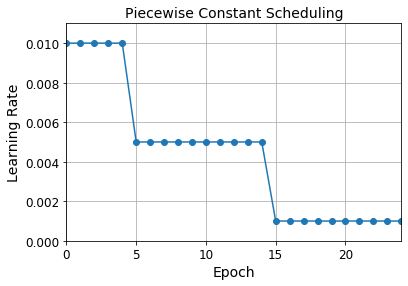

In [66]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Performance Scheduling

In [67]:
tf.random.set_seed(42)
np.random.seed(42)

In [68]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.5902 - accuracy: 0.8081 - val_loss: 0.4767 - val_accuracy: 0.8476
Epoch 2/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.5100 - accuracy: 0.8367 - val_loss: 0.4400 - val_accuracy: 0.8566
Epoch 3/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4976 - accuracy: 0.8449 - val_loss: 0.4885 - val_accuracy: 0.8360
Epoch 4/25
55000/55000 [==============================] - 3s 57us/sample - loss: 0.5116 - accuracy: 0.8478 - val_loss: 0.6338 - val_accuracy: 0.8480
Epoch 5/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.5328 - accuracy: 0.8478 - val_loss: 0.7667 - val_accuracy: 0.8330
Epoch 6/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.5428 - accuracy: 0.8501 - val_loss: 0.6829 - val_accuracy: 0.8536
Epoch 7/25
55000/55000 [==============================] -

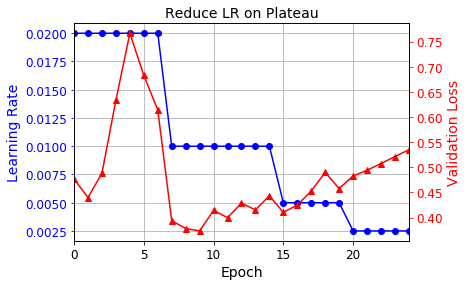

In [69]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

## tf.keras schedulers

In [70]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4873 - accuracy: 0.8296 - val_loss: 0.4139 - val_accuracy: 0.8554
Epoch 2/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3829 - accuracy: 0.8645 - val_loss: 0.3771 - val_accuracy: 0.8698
Epoch 3/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3495 - accuracy: 0.8762 - val_loss: 0.3696 - val_accuracy: 0.8724
Epoch 4/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3275 - accuracy: 0.8829 - val_loss: 0.3539 - val_accuracy: 0.8752
Epoch 5/25
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3103 - accuracy: 0.8897 - val_loss: 0.3457 - val_accuracy: 0.8786
Epoch 6/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.2972 - accuracy: 0.8944 - val_loss: 0.3409 - val_accuracy: 0.8804
Epoch 7/25
55000/55000 [==============================] -

In [ ]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

## 1Cycle scheduling

In [79]:
# to see the acceptable max of lr.

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [80]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Train on 55000 samples
55000/55000 [==============================] - 2s 28us/sample - loss: nan - accuracy: 0.3881           


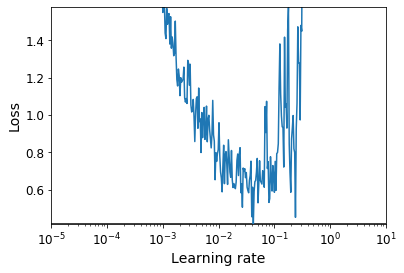

In [81]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [82]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [83]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 1s 26us/sample - loss: 0.6576 - accuracy: 0.7743 - val_loss: 0.4901 - val_accuracy: 0.8300
Epoch 2/25
55000/55000 [==============================] - 1s 25us/sample - loss: 0.4587 - accuracy: 0.8387 - val_loss: 0.4316 - val_accuracy: 0.8490
Epoch 3/25
55000/55000 [==============================] - 1s 24us/sample - loss: 0.4119 - accuracy: 0.8560 - val_loss: 0.4118 - val_accuracy: 0.8578
Epoch 4/25
55000/55000 [==============================] - 1s 24us/sample - loss: 0.3842 - accuracy: 0.8656 - val_loss: 0.3919 - val_accuracy: 0.8636
Epoch 5/25
55000/55000 [==============================] - 1s 23us/sample - loss: 0.3636 - accuracy: 0.8709 - val_loss: 0.3739 - val_accuracy: 0.8710
Epoch 6/25
55000/55000 [==============================] - 1s 23us/sample - loss: 0.3460 - accuracy: 0.8765 - val_loss: 0.3742 - val_accuracy: 0.8694
Epoch 7/25
55000/55000 [==============================] -

# Regularization

### l1 and l2

In [87]:
# E.g.: use functools to make it more neat

from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 5s 83us/sample - loss: 1.6006 - accuracy: 0.8129 - val_loss: 0.7374 - val_accuracy: 0.8236
Epoch 2/2
55000/55000 [==============================] - 4s 73us/sample - loss: 0.7179 - accuracy: 0.8265 - val_loss: 0.6905 - val_accuracy: 0.8356


### Dropout

In [88]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5856 - accuracy: 0.7992 - val_loss: 0.3908 - val_accuracy: 0.8570
Epoch 2/2
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4260 - accuracy: 0.8443 - val_loss: 0.3392 - val_accuracy: 0.8744


### Alpha Dropout

In [89]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 87us/sample - loss: 0.6655 - accuracy: 0.7581 - val_loss: 0.6729 - val_accuracy: 0.8266
Epoch 2/20
55000/55000 [==============================] - 5s 82us/sample - loss: 0.5528 - accuracy: 0.7969 - val_loss: 0.5881 - val_accuracy: 0.8392
Epoch 3/20
55000/55000 [==============================] - 5s 84us/sample - loss: 0.5256 - accuracy: 0.8061 - val_loss: 0.5299 - val_accuracy: 0.8434
Epoch 4/20
55000/55000 [==============================] - 4s 81us/sample - loss: 0.5058 - accuracy: 0.8139 - val_loss: 0.4903 - val_accuracy: 0.8572
Epoch 5/20
55000/55000 [==============================] - 4s 80us/sample - loss: 0.4936 - accuracy: 0.8165 - val_loss: 0.4877 - val_accuracy: 0.8620
Epoch 6/20
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4774 - accuracy: 0.8221 - val_loss: 0.5181 - val_accuracy: 0.8586
Epoch 7/20
55000/55000 [==============================] -

### MC Dropout

In [90]:
tf.random.set_seed(42)
np.random.seed(42)

In [91]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [92]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [93]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.46, 0.  , 0.5 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.72]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.18, 0.  , 0.81]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.52, 0.  , 0.47]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.03, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.56, 0.  , 0.44]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.07, 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.01, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.68]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.06, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.02, 0.  , 0

In [94]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.11, 0.  , 0.78]],
      dtype=float32)

In [95]:
y_pred = np.argmax(y_proba, axis=1)

accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8669

-------------
Alternatively if we have layers that are not dropout, e.g., BN, we should not force training=True for them:

In [96]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [97]:
tf.random.set_seed(42)
np.random.seed(42)

In [98]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

In [99]:
mc_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_160 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_161 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 10)              

In [100]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [101]:
mc_model.set_weights(model.get_weights())

In [102]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.11, 0.  , 0.81]],
      dtype=float32)

### Max norm

In [104]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4743 - accuracy: 0.8349 - val_loss: 0.4021 - val_accuracy: 0.8594
Epoch 2/2
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3579 - accuracy: 0.8683 - val_loss: 0.3456 - val_accuracy: 0.8756
